In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

### Reading datasets

In [2]:
NY_df = pd.read_csv('data/newyork_dataset', sep=',',low_memory=False, header=0, encoding='utf8')
CHI_df = pd.read_csv('data/chicago_dataset', sep=',',low_memory=False, header=0, encoding='utf8')
BOS_df = pd.read_csv('data/boston_dataset', sep=',',low_memory=False, header=0, encoding='utf8')

NY_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start hour,week day
0,88,2019-04-01 00:00:14.741,2019-04-01 00:01:42.8900,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,36515,Subscriber,1982,1,0,0
1,443,2019-04-01 00:00:20.827,2019-04-01 00:07:44.2920,254,W 11 St & 6 Ave,40.735324,-73.998004,540,Lexington Ave & E 29 St,40.743116,-73.982154,17406,Subscriber,1983,1,0,0
2,662,2019-04-01 00:00:30.996,2019-04-01 00:11:33.2610,3244,University Pl & E 8 St,40.731437,-73.994903,3244,University Pl & E 8 St,40.731437,-73.994903,20775,Subscriber,1988,1,0,0
3,86,2019-04-01 00:00:30.911,2019-04-01 00:01:56.9600,526,E 33 St & 5 Ave,40.747659,-73.984907,474,5 Ave & E 29 St,40.745168,-73.986831,36270,Subscriber,1982,1,0,0
4,136,2019-04-01 00:00:32.593,2019-04-01 00:02:49.3910,461,E 20 St & 2 Ave,40.735877,-73.982050,504,1 Ave & E 16 St,40.732219,-73.981656,36051,Subscriber,1986,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766089,516,2019-04-30 23:59:33.752,2019-05-01 00:08:10.1700,397,Fulton St & Clermont Ave,40.684157,-73.969223,3232,Bond St & Fulton St,40.689622,-73.983043,15005,Subscriber,1983,1,23,1
1766090,435,2019-04-30 23:59:35.085,2019-05-01 00:06:50.4610,432,E 7 St & Avenue A,40.726218,-73.983799,349,Rivington St & Ridge St,40.718502,-73.983299,27227,Subscriber,1992,1,23,1
1766091,564,2019-04-30 23:59:40.105,2019-05-01 00:09:04.3660,3709,W 15 St & 6 Ave,40.738046,-73.996430,432,E 7 St & Avenue A,40.726218,-73.983799,16766,Subscriber,1985,1,23,1
1766092,675,2019-04-30 23:59:43.265,2019-05-01 00:10:58.6670,353,S Portland Ave & Hanson Pl,40.685396,-73.974315,3549,Grand Ave & Bergen St,40.678045,-73.962408,17787,Subscriber,1976,1,23,1


Below are shown some general data analysis that can be made throught the usage of the different features of the datasets.

## Birth Year

Let's see how the BSS's trends on number of trips with relation to the birth year of the users.

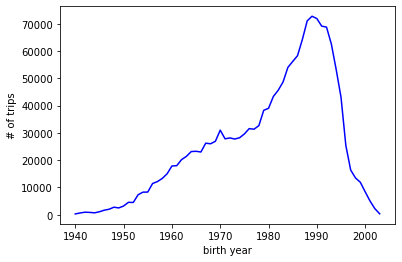

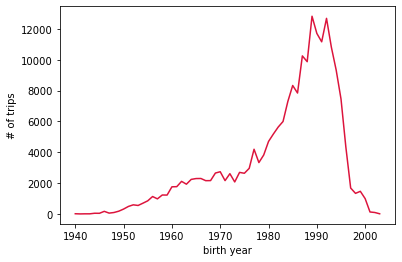

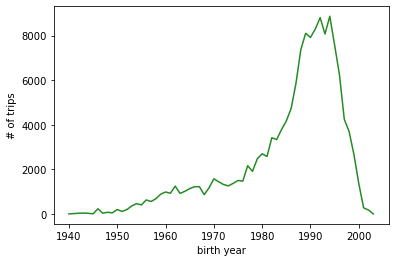

In [3]:
def birth_year(df, c):
    # some parsing before plotting
    # it seems that these are default values
    df.drop(df[(df['gender'] == 0) & (df['birth year'] == 1969)].index, inplace = True)
    # there may be errors in birth years
    df = df[df['birth year'] > 1939].copy()
    
    year_counts = df.groupby(['birth year']).size()
    year_counts = year_counts.reset_index(level=['birth year'])
    plt.plot(year_counts['birth year'].tolist(), year_counts[0].tolist(), color=c)
    plt.xlabel('birth year')
    plt.ylabel('# of trips')
    plt.show()
    
birth_year(NY_df, 'blue')
birth_year(CHI_df, 'crimson')
birth_year(BOS_df, 'forestgreen')

It seems clear that most of the trips are made by people born around 1970/80 and 1995, having from 40 to 20 years. 

This means that the systems are used for the most part by people who work and by college students too, and this is an axpect that is underlined also by the following analysis.

## Weekly trend

This analysis underlines the different traffic patterns bewteen days of the week both in amount of traffic and in the usage wrt the hour of the day.

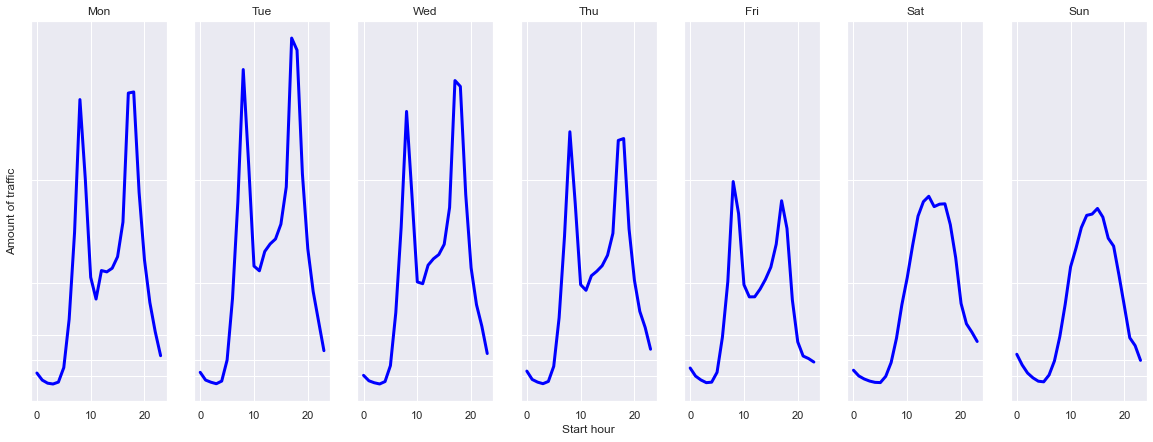

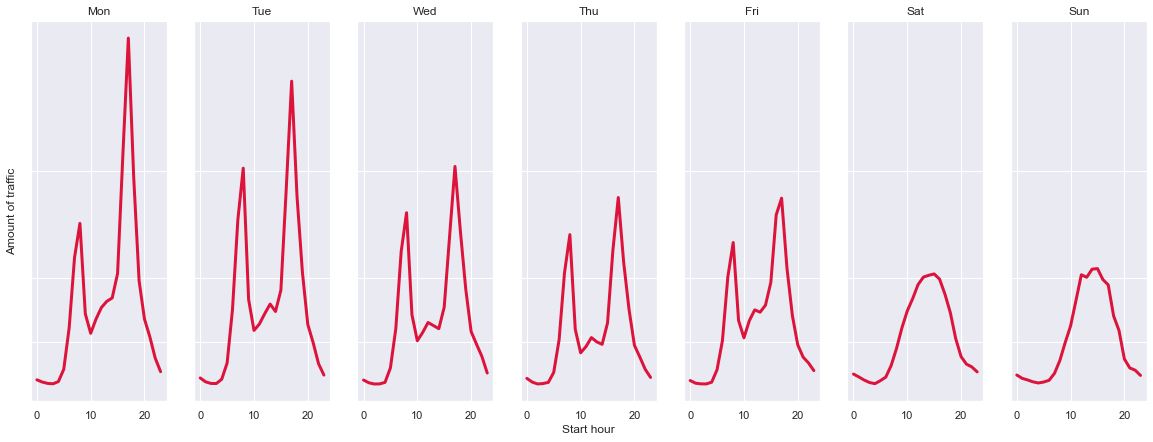

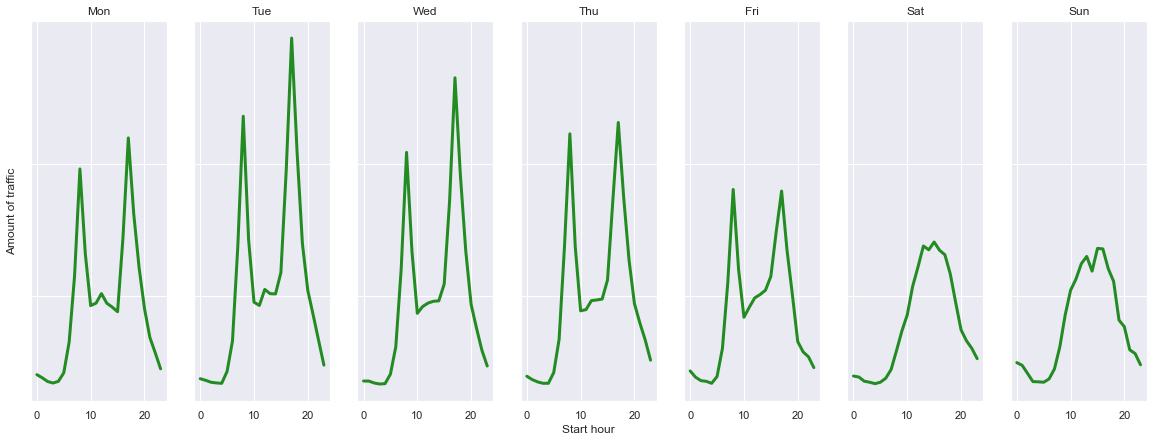

In [4]:
def weekly_trend(df, c):
    day_count = df[['week day', 'start hour', 'tripduration']].groupby(['week day', 'start hour']).count()
    day_count = day_count.reset_index(level=['week day', 'start hour'])
    sns.set(font_scale=1)
    fig, ax = plt.subplots(1, 7, figsize=(20, 7), sharey='all')
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    hours = range(0,24)
    for day in range(len(days)):
        sns.lineplot(ax=ax[day], data=day_count[day_count['week day'] == day],
                     linewidth=3, x='start hour', y='tripduration', color=c).set_title(days[day])
        ax[day].set_xlabel('Start hour')
        if day == 0:
            ax[day].set_ylabel('Amount of traffic')
            ax[day].set_yticks([1000, 2500, 5000, 10000, 20000, 50000])
        else:
            ax[day].set_ylabel('')
            ax[day].set_yticklabels('')
        if day != 3:
            ax[day].set_xlabel('')
    plt.show()
    
weekly_trend(NY_df, 'blue')
weekly_trend(CHI_df, 'crimson')
weekly_trend(BOS_df, 'forestgreen')

sns.reset_orig()

From these plots it can be seen that for all the three BSS the bike traffic is much more intense during the week days with respect to the week ends. It can also be noticed that the peak hours are different since in from Monday to Friday the most traffocked hours are around 8 and 18, althought this behaviour tends to be less noticeable going on with the week, and these hours corresponds with the commute directed towards work and educational places.

### Here it's analyzed the trend of the most trafficked stations both for incoming and outgoing bikes.

## Usage compared to trips duration

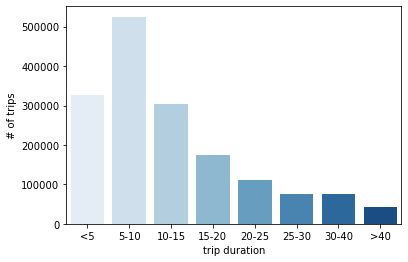

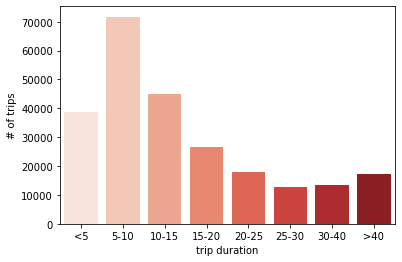

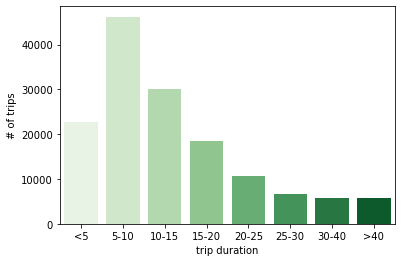

In [5]:
def tripduration(df, cm):
    temp = df.copy()
    # To avoid too much dispersion in data, we grouped tripduration in labels.
    temp['tripduration'] = pd.cut(df['tripduration'], bins=[0, 300, 600, 900, 1200, 1500, 1800, 2400, 10000],
                            include_lowest=True, right=False,
                            labels=['<5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-40', '>40'])
    sns.countplot(data=temp, x=temp['tripduration'], palette=cm)
    plt.xlabel('trip duration')
    plt.ylabel('# of trips')
    plt.show()
    
tripduration(NY_df, 'Blues')
tripduration(CHI_df, 'Reds')
tripduration(BOS_df, 'Greens')

Most of the trips are made within 15 minutes meaning that they cover the so called "last mile", which is the path connecting work and educational spaces to parking lots and stops of the public mass transports such as subways, metro and buses.

Below it will be shown the fact that the most trafficed stations are positioned near these spots.

## Geographic Maps

Here it is reported as an example only the case for New York City.

In [6]:
import geopandas as gpd

# importing dataset cotaining the necessary values
# from 'Network_Analysis' notebook
NY_stations = pd.read_csv('data/newyork_stations_scores', sep=',',low_memory=False, header=0, encoding='utf8')

# from https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
ny_geo = gpd.read_file('data/ny_districts.geojson')

# 9 most trafficked subway stations for NY from : 
# https://www.worldatlas.com/articles/the-busiest-subway-stations-in-new-york-city.html
sub_st_names = ['Times Sq - 42nd St', 'Grand Central - 42nd St', 'Herald Sq - 34th St',
                'Union Sq - 14th St', '34th St - Penn Station', '59th St - Columbus Circle',
                'Fulton St', 'Lexington Ave - 59th St', '86th St']

sub_stations = gpd.read_file('data/ny_subway.geojson')
sub_stations = sub_stations[['name', 'geometry']][sub_stations['name'].isin(sub_st_names)].drop_duplicates('name')

In [7]:
# Need to make NY_stations a GeoDataFrame
from shapely.geometry import Point

geom = []
for long, lat in zip(NY_stations['longitude'], NY_stations['latitude']):
    geom.append(Point(long, lat))

NY_stations['geometry'] = geom
NY_gdf = gpd.GeoDataFrame(NY_stations, geometry = 'geometry')

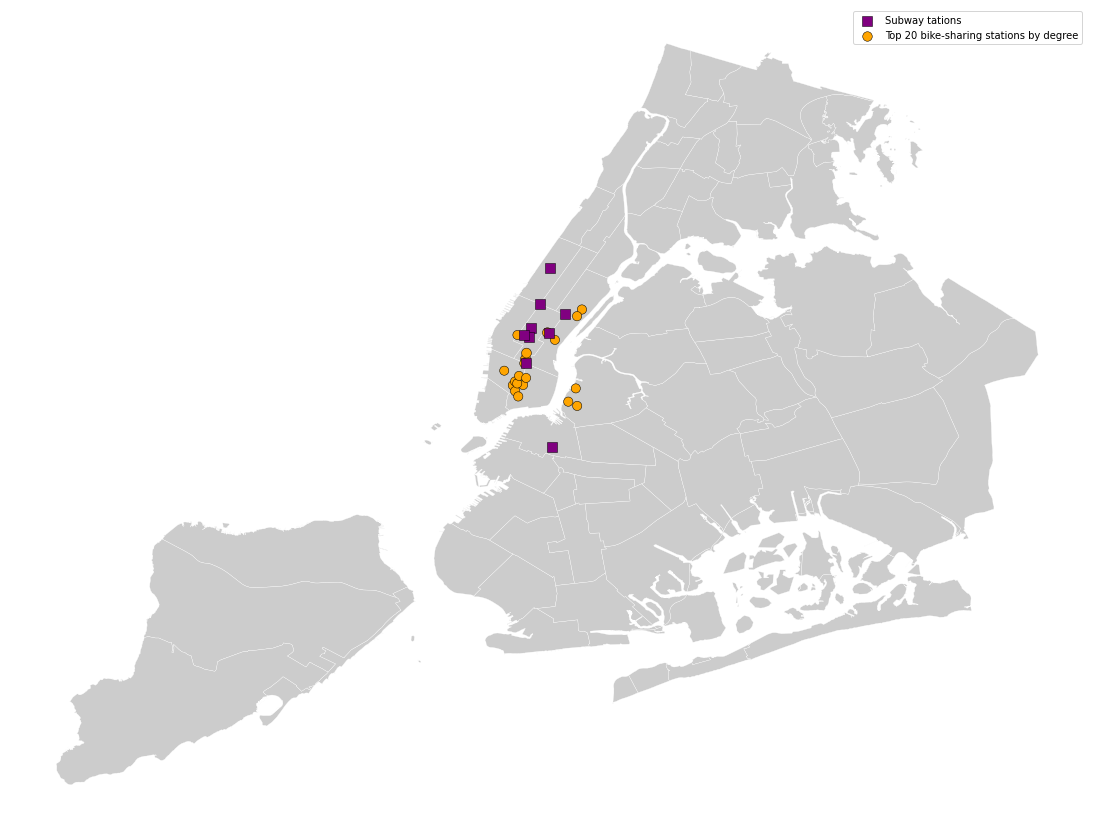

In [8]:
fig, ax = plt.subplots(figsize=(20,15))
ax.axis('off')
ny_geo.plot(ax=ax, edgecolor='white', linewidth=0.3, color='0.8')
sub_stations.plot(ax=ax, marker=',', color='purple', markersize = 100, zorder=3, edgecolor='black', linewidth=0.5)
# plotting only the most trafficked stations
NY_gdf_copy = NY_gdf.sort_values('degree', ascending=False).head(20)
NY_gdf_copy.plot(ax=ax, markersize=NY_gdf_copy['degree']/10, color='orange', edgecolor='black', linewidth=0.5)
ax.legend(['Subway tations', 'Top 20 bike-sharing stations by degree'])

## Gender

Men mean trip duration (sec): 912.1978062469277
Women mean trip duration (sec): 1107.574335731825


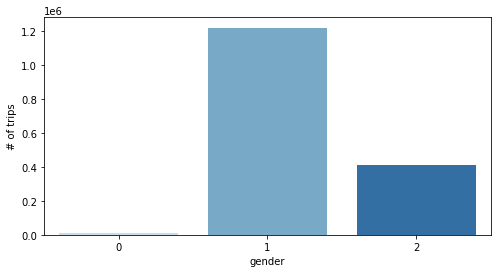

Men mean trip duration (sec): 871.0598141915315
Women mean trip duration (sec): 1051.6037314747743


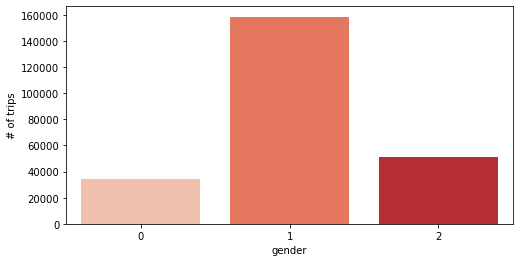

Men mean trip duration (sec): 976.3323644391298
Women mean trip duration (sec): 1284.160375050958


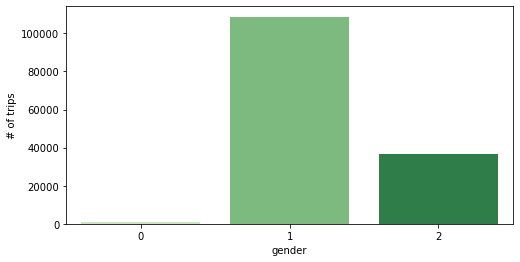

In [13]:
def gender(df, cm):
    df = df.fillna(0)
    df = df.astype({'gender': int})
    
    # difference in tripduration
    m_td = df[df['gender'] == 1]
    f_td = df[df['gender'] == 2]
    print('Men mean trip duration (sec): ' + str(m_td['tripduration'].sum() / m_td.shape[0]))
    print('Women mean trip duration (sec): ' + str(f_td['tripduration'].sum() / f_td.shape[0]))
    
    # difference in # of trips
    plt.subplots(figsize=(8, 4))
    sns.countplot(data=df, x='gender', palette=cm)
    plt.xlabel('gender')
    plt.ylabel('# of trips')
    plt.show()
    
gender(NY_df, 'Blues')
gender(CHI_df, 'Reds')
gender(BOS_df, 'Greens')

It's clear that most of the trips are made by men, althought it's not clear the real reason of it. Maybe a better understanding on the security and presence of bike lanes in the cities could give more details about that.